**LGMVIP - Data Science Intern, September-2022**

**AUTHOR Name - Shaikh Zainab**

**01 BEGINNER LEVEL task**

**2)Stock Market Prediction And Forecasting Using Stacked LSTM**

**Data Collection**

**Importing The Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

**Reading The Dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lets Grow More Dataset/TataGlobal.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df1=data.reset_index()['Close']

In [ ]:
df1.shape

(2035,)

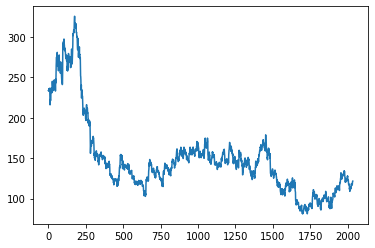

In [ ]:
plt.plot(df1)

**LSTM are sensitive to the scale of the data,so we apply MinMax scaler**

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(2035, 1)

In [ ]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Splitting dataset into train and test split**

In [ ]:
training_size = int(len(df1) * 0.75)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

**Data preprocessing**

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

**Reshape the input to be [samples, time steps, features] which is the requirement of LSTM**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Create the LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 18s 320ms/step - loss: 0.0330 - val_loss: 0.0059
Epoch 2/100
23/23 [==============================] - 6s 251ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 6s 264ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 4/100
23/23 [==============================] - 6s 269ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 5s 230ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
23/23 [==============================] - 7s 287ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 5s 207ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 8/100
23/23 [==============================] - 7s 315ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/100
23/23 [==============================] - 5s 236ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 5s 240ms/step - loss: 0.0011 - val_l

**predict and check performance metrics**

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

**Transform back to original form**

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Calculate RMSE performance metrics**

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

164.3863436430439

**Test Data RMSE**

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

106.85109540477771

**Plotting**

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

**Shift test prediction for plotting**

In [ ]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

**Plot baseline and predictions**

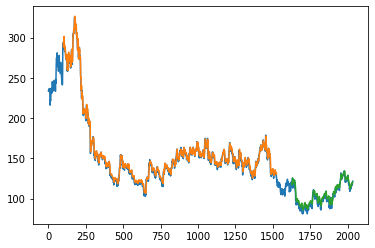

In [ ]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()